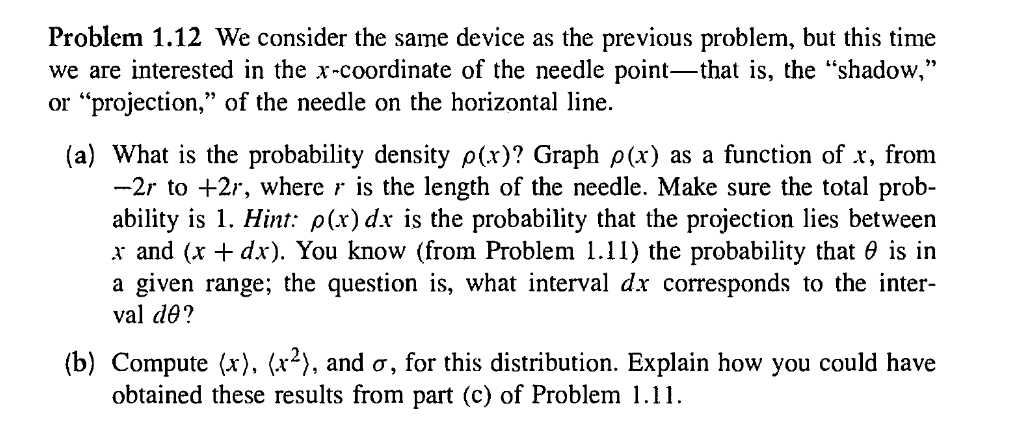

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

Consider the random variable θ between 0 and π and we want to compute the probability density function for cos(θ) then we can set up a monte carlo technique to see what that might look like.

In [92]:
sample = np.random.random_sample(100000)*np.pi
bins = np.histogram(sample, bins=40)
bins_cos = np.histogram(np.cos(sample), bins=40)

<BarContainer object of 40 artists>

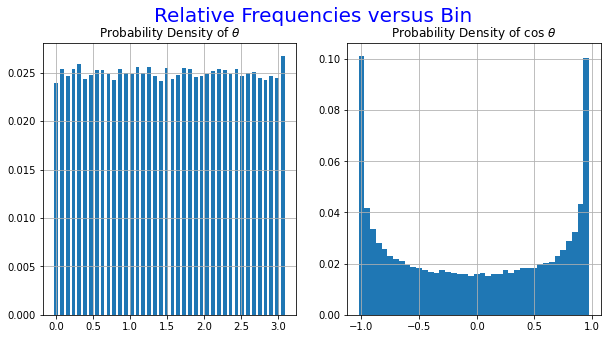

In [95]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
ax1, ax2 = axes

fig.suptitle("Relative Frequencies versus Bin", fontsize=20, color="blue")

y, x = bins
y = y/y.sum()
ax1.grid()
ax2.grid()
ax1.bar(x[:len(y)], y, width=0.05)

y, x = bins_cos
y = y/y.sum()

ax1.set_title(r"Probability Density of $ \theta $")
ax2.set_title(r"Probability Density of cos $\theta$")
ax2.bar(x[:len(y)], y, width=0.05)



In [94]:
1/np.pi

The reasoning I am following here is that the random variable is coming from a uniform probability distribution on the domain [0, π].  Therefore after passing it through a function cos(x) then the domain is mapped to [-1, 1].  However if we divide the original uniform domain into N equal segments then all we have to do is track those individual segments and see where they end up after passing through cos(x).  Note that the new range [-1,1] has a length of 2 so the new segments, on the x axis, should sum to that.

$$ \sum_{i=0}^{N} \left [ \left ( \cos(\frac{(i+1) \pi}{N}) - \cos (\frac{i \pi}{N}) \right ) \right ] = 2 $$
 
$$ \text{whereas } \left ( \cos(\frac{(i+1) \pi}{N}) - \cos (\frac{i \pi}{N}) \right ) \textrm{pdf}(\frac{(i+\frac{1}{2}) \pi}{N}) = \frac{1}{N} $$

dividing by 1/N and taking limits

$$ \lim_{ \frac{1}{N} \to 0}  \frac{\left ( \cos(\frac{(i+1) \pi}{N}) - \cos (\frac{i \pi}{N}) \right ) \textrm{pdf}(x_i)}{\frac{1}{N}} = \sin(x_i) \; \textrm{pdf}(x_i) = 1 $$

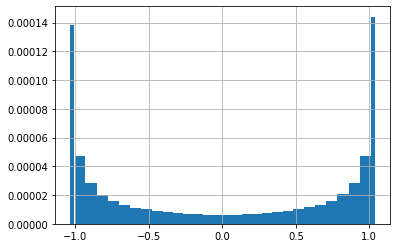

In [124]:
N=40
ii = np.arange(0.01, N+1)
cs = np.cos(ii*np.pi/N)
dcs = np.diff(cs)
pdf = np.abs(1/(N*dcs))/pdf.sum()
#print (pdf)

plt.bar(ii[1:]/N*2.1-1/N-1.05, pdf, width=dcs*8)
plt.grid()

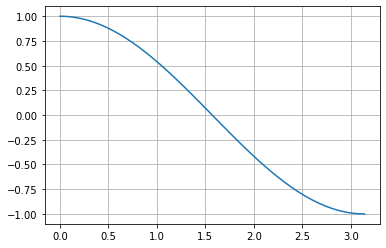

In [99]:
x = np.linspace(0, np.pi,100)
y = np.cos(x)
plt.grid()
plt.plot(x,y)

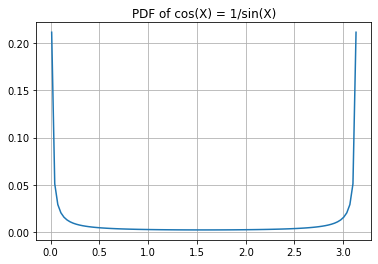

In [162]:
x = np.linspace(0.01, np.pi-0.01,100)
y = 1/np.sin(x)
A = 1/y.sum()
plt.grid()
plt.title("PDF of cos(X) = 1/sin(X)")
plt.plot(x,A*y)

compute \<x>, <x²> and σ

In [126]:
x = sym.symbols("x", real=True)
sym.integrate(x/sym.sin(x))

The graph of x/sin(x) looks like the following and has no integral in terms of elementary functions.

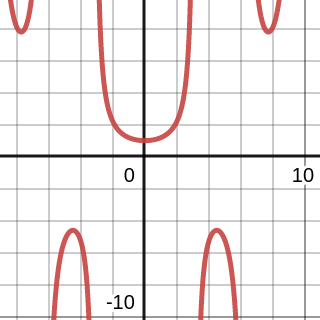

In [148]:
from scipy.integrate import quad, quadrature

In [153]:
def f(x):
    return x/np.sin(x)

In [146]:
res = quad(f, 0, np.pi-0.0000000001, full_output=1, limit=50 )

In [158]:
res = quadrature(f, 0, np.pi, maxiter=1000)

/home/splat/venvs/jupyter-notebook/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (1000) exceeded. Latest difference = 6.283111e-03
  warnings.warn(


In [159]:
res